In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [34]:
df = pd.read_excel('assign2_data.xlsx', parse_dates=['Date'])

df.head()

,Date,Close,daily % chg,20day vol,previous 20d return,next 20 day return,zvol20,zfret20,zret20
0,1960-01-04,59.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-01-05,60.389999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-01-06,60.130001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-01-07,59.689999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-01-08,59.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.sort_values(by='Date', inplace=True)

## Part A
STEP 1: We calculate daily returns using the following formula:
[(Close(t) / Close(t-1)) - 1] * 100
- [(Closing price on the current day / Closing price on the previous day) - 1] * 100


In [36]:
df['daily % chg'] = (df['Close'].pct_change(periods=1)) * 100 # daily returns

In [37]:
df[['Date', 'Close', 'daily % chg']].head(15)

,Date,Close,daily % chg
0,1960-01-04,59.910000,NaN
1,1960-01-05,60.389999,0.801200
2,1960-01-06,60.130001,-0.430532
3,1960-01-07,59.689999,-0.731751
4,1960-01-08,59.500000,-0.318310
5,1960-01-11,58.770000,-1.226891
6,1960-01-12,58.410000,-0.612557
7,1960-01-13,58.080002,-0.564968
8,1960-01-14,58.400002,0.550964
9,1960-01-15,58.380001,-0.034248


STEP 2: We calculate the 20-day volatility of these daily returns.

In [38]:
df['vol20'] = df['daily % chg'].rolling(window=20).std(ddof=1) # 20 day volatility

In [39]:
df[['Date', 'daily % chg', 'vol20']].head(30)

,Date,daily % chg,vol20
0,1960-01-04,NaN,NaN
1,1960-01-05,0.801200,NaN
2,1960-01-06,-0.430532,NaN
3,1960-01-07,-0.731751,NaN
4,1960-01-08,-0.318310,NaN
5,1960-01-11,-1.226891,NaN
6,1960-01-12,-0.612557,NaN
7,1960-01-13,-0.564968,NaN
8,1960-01-14,0.550964,NaN
9,1960-01-15,-0.034248,NaN


STEP 3: Now, we calculate "ret20" - historical 20-day returns until that day (i.e. 
using 21 prices) and "fret20" - 20 day FUTURE return from that day, that is, return for the next 20 days

In [40]:
df['ret20'] = (df['Close'] / df['Close'].shift(20) - 1) * 100 # historical 20 day returns

In [41]:
df['fret20'] = (df['Close'].shift(-20) / df['Close'] - 1) * 100 # future 20 day returns

In [42]:
print(df[['Date', 'Close', 'ret20', 'fret20']].head(30))

         Date      Close     ret20    fret20
0  1960-01-04  59.910000       NaN -6.593225
1  1960-01-05  60.389999       NaN -5.911573
2  1960-01-06  60.130001       NaN -6.336273
3  1960-01-07  59.689999       NaN -5.729601
4  1960-01-08  59.500000       NaN -5.915966
5  1960-01-11  58.770000       NaN -5.870342
6  1960-01-12  58.410000       NaN -4.399932
7  1960-01-13  58.080002       NaN -4.459366
8  1960-01-14  58.400002       NaN -5.513702
9  1960-01-15  58.380001       NaN -5.001716
10 1960-01-18  57.889999       NaN -4.698568
11 1960-01-19  57.270000       NaN -4.435132
12 1960-01-20  57.070000       NaN -3.574559
13 1960-01-21  57.209999       NaN -2.464604
14 1960-01-22  57.380001       NaN -1.986753
15 1960-01-25  56.779999       NaN -1.479394
16 1960-01-26  56.860001       NaN -1.969748
17 1960-01-27  56.720001       NaN -1.392809
18 1960-01-28  56.130001       NaN  0.053446
19 1960-01-29  55.610001       NaN  0.917098
20 1960-02-01  55.959999 -6.593225  0.089348
21 1960-02

In [43]:
print(df[['Date', 'Close', 'ret20', 'fret20']].tail(30))

            Date        Close     ret20    fret20
10293 2000-11-16  1372.319946 -1.183794 -4.384540
10294 2000-11-17  1367.719971 -2.091020 -3.288683
10295 2000-11-20  1342.619995 -3.808625 -2.757297
10296 2000-11-21  1347.349976 -3.631996 -6.131294
10297 2000-11-22  1322.359985 -3.116715 -3.592063
10298 2000-11-24  1341.770020 -1.661482 -2.669613
10299 2000-11-27  1348.969971 -2.218790 -2.504135
10300 2000-11-28  1336.089966 -4.473572 -0.536635
10301 2000-11-29  1341.930054 -6.119349 -0.574552
10302 2000-11-30  1314.949951 -7.477380  0.405345
10303 2000-12-01  1315.229980 -7.917691       NaN
10304 2000-12-04  1324.969971 -7.129788       NaN
10305 2000-12-05  1376.540039 -3.885651       NaN
10306 2000-12-06  1351.459961 -5.615736       NaN
10307 2000-12-07  1343.550049 -4.664082       NaN
10308 2000-12-08  1369.890015 -2.160498       NaN
10309 2000-12-11  1380.199951  1.041009       NaN
10310 2000-12-12  1371.180054  1.474183       NaN
10311 2000-12-13  1359.989990 -1.660216       NaN


STEP 4: Let's normalize the returns and volailtity using Z-Score with Formula:

z(i) = (X(i) - μ) / σ

where:

- z(i): The z-score of the data point i.
- X(i): The value of the data point i.
- μ: The mean of the dataset.
- σ: The standard deviation of the dataset.

In [44]:
def normalize_zscore(series, window=250):
    mean = series.shift(1).rolling(window=window, min_periods=window).mean()
    std = series.shift(1).rolling(window=window, min_periods=window).std(ddof=1)
    return (series - mean) / std

df['zvol20'] = normalize_zscore(df['vol20'])
df['zret20'] = normalize_zscore(df['ret20'])
df['zfret20'] = normalize_zscore(df['fret20'])

In [45]:
df[['Date', 'vol20', 'zvol20', 'ret20', 'zret20', 'fret20', 'zfret20']].head(300)

,Date,vol20,zvol20,ret20,zret20,fret20,zfret20
0,1960-01-04,NaN,NaN,NaN,NaN,-6.593225,NaN
1,1960-01-05,NaN,NaN,NaN,NaN,-5.911573,NaN
2,1960-01-06,NaN,NaN,NaN,NaN,-6.336273,NaN
3,1960-01-07,NaN,NaN,NaN,NaN,-5.729601,NaN
4,1960-01-08,NaN,NaN,NaN,NaN,-5.915966,NaN
...,...,...,...,...,...,...,...
295,1961-03-06,0.511775,-0.568405,2.941180,0.571925,2.513663,0.363438
296,1961-03-07,0.528007,-0.458626,2.768787,0.514907,3.135336,0.550285
297,1961-03-08,0.524685,-0.474791,2.903482,0.549215,3.420558,0.637885
298,1961-03-09,0.492925,-0.674398,2.073623,0.296190,3.874014,0.776443


STEP 5: Trim Invalid Rows

- Removed invalid rows (first 271 rows for z-scores and last 20 rows for fret20).

In [46]:
df_trim = df.dropna(subset=['zvol20', 'zret20', 'zfret20']).copy()

print("Original rows:", len(df))
print("Rows after cleaning:", len(df_trim))

df_trim[['Date', 'zvol20', 'zret20', 'zfret20']].head(15)

Original rows: 10323
Rows after cleaning: 10033


,Date,zvol20,zret20,zfret20
270,1961-01-27,-1.019421,1.513737,0.721850
271,1961-01-30,-0.751036,1.835700,0.426471
272,1961-01-31,-1.164286,2.014070,0.509438
273,1961-02-01,-1.597756,1.637665,0.645076
274,1961-02-02,-1.531321,1.712923,0.491147
275,1961-02-03,-1.591842,1.750213,0.571925
276,1961-02-06,-1.216424,1.296387,0.514907
277,1961-02-07,-1.141894,1.150123,0.549215
278,1961-02-08,-0.969646,1.328844,0.296190
279,1961-02-09,-0.860116,1.134403,0.375714


In [47]:
df_new = df[:-20]

# Filter rows where z-scores are valid (starting from row 271, indexed at 0)
df_clean = df_new[df_new.index >= 271].copy()

In [48]:
df_clean.head(10)

,Date,Close,daily % chg,20day vol,previous 20d return,next 20 day return,zvol20,zfret20,zret20,vol20,ret20,fret20
271,1961-01-30,61.970001,1.192030,NaN,NaN,NaN,-0.751036,0.426471,1.835700,0.505493,6.642574,2.372112
272,1961-01-31,61.779999,-0.306603,NaN,NaN,NaN,-1.164286,0.509438,2.014070,0.439102,7.312835,2.670769
273,1961-02-01,61.900002,0.194242,NaN,NaN,NaN,-1.597756,0.645076,1.637665,0.368761,6.065800,3.150236
274,1961-02-02,62.299999,0.646199,NaN,NaN,NaN,-1.531321,0.491147,1.712923,0.376860,6.368446,2.648478
275,1961-02-03,62.220001,-0.128408,NaN,NaN,NaN,-1.591842,0.571925,1.750213,0.364843,6.541094,2.941180
276,1961-02-06,61.759998,-0.739317,NaN,NaN,NaN,-1.216424,0.514907,1.296387,0.422738,5.016149,2.768787
277,1961-02-07,61.650002,-0.178102,NaN,NaN,NaN,-1.141894,0.549215,1.150123,0.433127,4.544685,2.903482
278,1961-02-08,62.209999,0.908349,NaN,NaN,NaN,-0.969646,0.296190,1.328844,0.459413,5.191072,2.073623
279,1961-02-09,62.020000,-0.305416,NaN,NaN,NaN,-0.860116,0.375714,1.134403,0.475860,4.551585,2.354079
280,1961-02-10,61.500000,-0.838439,NaN,NaN,NaN,-0.534204,0.717046,0.729225,0.527331,3.187923,3.512195


### Questions:
- Bucket the volatility, zvol20, into quintiles.


To carry this out we do the following:

- Sort the data by zvol20 in ascending order.
- Divide the sorted data into 5 equal groups, representing the quintiles.
- Assign each data point to its corresponding quintile.
- This process allows us to categorize the data based on volatility levels, facilitating further analysis of the relationship between volatility and returns within each quintile.

In [49]:
df_sorted = df_trim.sort_values(by='zvol20').reset_index(drop=True)
df_sorted['zvol20_quintile'] = pd.qcut(df_sorted['zvol20'], 5, labels=False) + 1    # use qcut to create quintiles
df_sorted['zvol20_quintile'].value_counts().sort_index()

zvol20_quintile
1    2007
2    2006
3    2007
4    2006
5    2007
Name: count, dtype: int64

ANALYSIS 1: Is there a (concurrent) relationship between the normalized volatility of the 
market and its normalized returns? I.e. Between zvol20 and zret20? What is it?

Concurrent Relationship (normalized volatility of the market vs its normalized returns):
   zvol20_quintile    zvol20    zret20
0                1 -1.254323  0.136937
1                2 -0.663422  0.076439
2                3 -0.197676  0.057703
3                4  0.448875 -0.062529
4                5  2.072533 -0.442012


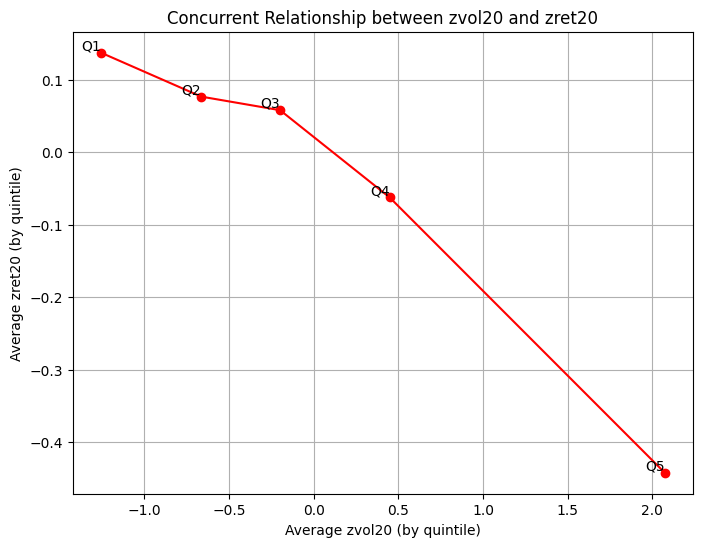

In [54]:
concurrent_rels = df_sorted.groupby('zvol20_quintile').agg({
    'zvol20': 'mean',
    'zret20': 'mean'
}).reset_index()

print("Concurrent Relationship (normalized volatility of the market vs its normalized returns):")
print(concurrent_rels)

plt.figure(figsize=(8,6))
plt.plot(concurrent_rels['zvol20'], concurrent_rels['zret20'], marker='o', color='red')
plt.title('Concurrent Relationship between zvol20 and zret20')
plt.xlabel('Average zvol20 (by quintile)')
plt.ylabel('Average zret20 (by quintile)')
plt.grid(True)

for i in range(len(concurrent_rels)):       # Label each point with the quintile number
    plt.text(concurrent_rels['zvol20'][i], concurrent_rels['zret20'][i],
             f"Q{concurrent_rels['zvol20_quintile'][i]}",
             fontsize=10,
             ha='right',
             va='bottom')

plt.show()

OBSERVATION:
- Plot shows a downward trend, higher volatility (zvol20) is associated with lower concurrent returns (zret20). This aligns with the leverage effect (volatility spikes during market declines).

Possible Reasons: 
- Market stress often increases volatility and correlates with negative price moves (this is called the “leverage effect” in equity markets).
- Risk Aversion / Fear Factor: High volatility often accompanies market drawdowns, so returns over that period are lower.
- Market Turbulence: Big swings in prices (high vol) often happen during corrections or crises, pulling returns down in that same window.

Investors react to negative shocks by selling assets, increasing volatility and driving down prices simultaneously.

ANALYSIS 2: Is there a (lead-lag) relationship between the normalized volatility of the market 
and its FUTURE normalized returns? i.e. Between zvol20 and zfret20? Plot the 
five averages, with zvol20 on the X-axis and zfret20 on the Y-axis.

Lead-Lag Relationship (zvol20 vs. zfret20):
   zvol20_quintile    zvol20   zfret20
0                1 -1.254323 -0.163702
1                2 -0.663422 -0.114088
2                3 -0.197676 -0.067948
3                4  0.448875  0.004024
4                5  2.072533  0.090649


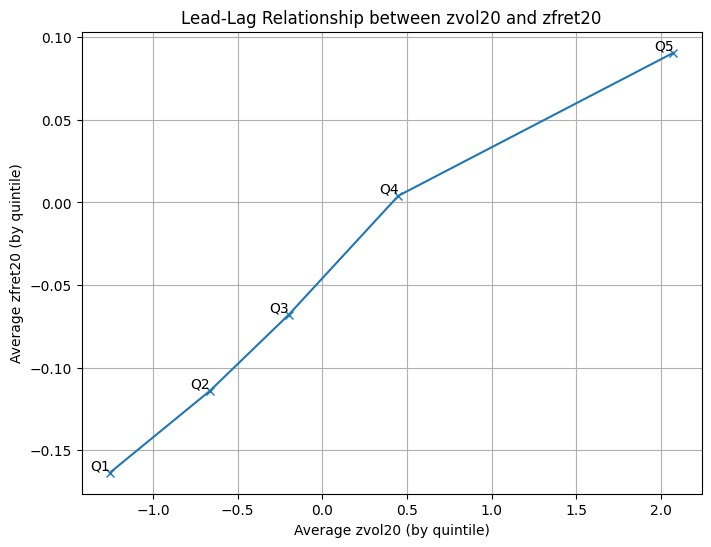

In [55]:
leadlag_rels = df_sorted.groupby('zvol20_quintile').agg({
    'zvol20': 'mean',
    'zfret20': 'mean'
}).reset_index()

print("Lead-Lag Relationship (zvol20 vs. zfret20):")
print(leadlag_rels)

plt.figure(figsize=(8,6))
plt.plot(leadlag_rels['zvol20'], leadlag_rels['zfret20'], marker='x')
plt.title('Lead-Lag Relationship between zvol20 and zfret20')
plt.xlabel('Average zvol20 (by quintile)')
plt.ylabel('Average zfret20 (by quintile)')
plt.grid(True)

for i in range(len(leadlag_rels)):
    plt.text(leadlag_rels['zvol20'][i], leadlag_rels['zfret20'][i],
             f"Q{leadlag_rels['zvol20_quintile'][i]}",
             fontsize=10,
             ha='right',
             va='bottom')
    
plt.show()

OBSERVATIONS:
- Plot slopes upward, high volatility predicts higher future returns (investors demand a risk premium).

Possible Reasons:

- Mean reversion after selloffs, or a higher risk premium demanded by investors leading to higher subsequent returns.

A positive relationship could indicate short-term overselling followed by rebounds.

Hypothesis for the Patterns:
1. Negative concurrent: Volatility spikes often occur during sell-offs.
2. Positive future: After big sell-offs and volatility spikes, markets can rebound.

Concurrent: Market stress (high volatility) coincides with price declines.

Lead-Lag: High volatility periods are followed by market recoveries, possibly due to contrarian buying or risk premia.

Let's try experimenting with different durations of volatility (say 5 and 10 days) and returns to test whether the relationship holds up more generally.

In [56]:
def experiment_indicators(df, window):
    df[f'vol{window}'] = df['daily % chg'].rolling(window=window).std(ddof=1)  # Rolling volatility over the window

    df[f'ret{window}'] = (df['Close'] / df['Close'].shift(window) - 1) * 100  # Historical return over the past 'window' days
    
    df[f'fret{window}'] = (df['Close'].shift(-window) / df['Close'] - 1) * 100  # Future return over the next 'window' days

    def rolling_zscore(series, lookback=250):  # Compute normalized (z-scored) series using a 250-day trailing window.
        mean = series.shift(1).rolling(window=lookback, min_periods=window).mean()
        std = series.shift(1).rolling(window=lookback, min_periods=window).std(ddof=1)
        return (series - mean) / std

    df[f'zvol{window}'] = rolling_zscore(df[f'vol{window}'], lookback=250)
    df[f'zret{window}'] = rolling_zscore(df[f'ret{window}'], lookback=250)
    df[f'zfret{window}'] = rolling_zscore(df[f'fret{window}'], lookback=250)

    return df

# Experiment with 5-day and 10-day indicators:
df = experiment_indicators(df, 5)
df = experiment_indicators(df, 10)

5-Day Concurrent Stats:
   zvol5_quintile     zvol5     zret5
0               1 -1.149609  0.017369
1               2 -0.569184  0.037077
2               3 -0.179409  0.060089
3               4  0.351710 -0.021025
4               5  1.783896 -0.156278


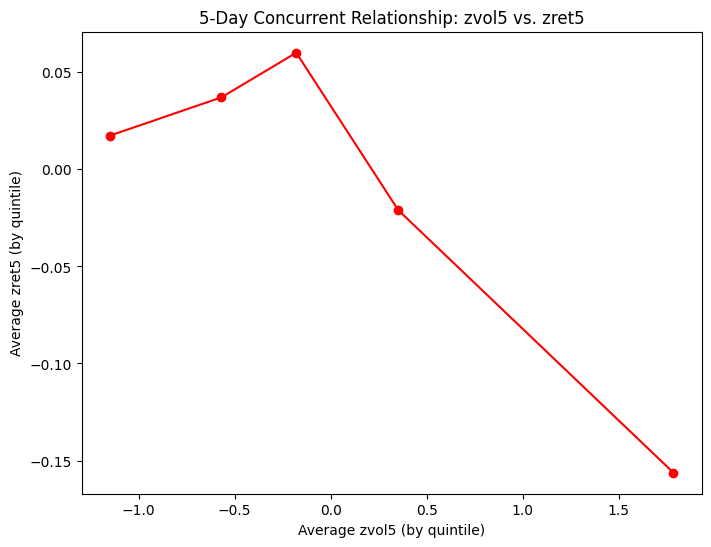

In [57]:
# Concurrent Relationship: Group by quintile and compute average zvol5 and average zret5.
df_trim_5 = df.dropna(subset=['zvol5', 'zret5', 'zfret5']).copy()
df_trim_5['zvol5_quintile'] = pd.qcut(df_trim_5['zvol5'], 5, labels=False) + 1
concurrent_rels_5 = df_trim_5.groupby('zvol5_quintile').agg({'zvol5': 'mean', 'zret5': 'mean'}).reset_index()
print("5-Day Concurrent Stats:")
print(concurrent_rels_5)

# Plot concurrent relationship: zvol5 (X-axis) vs. zret5 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(concurrent_rels_5['zvol5'], concurrent_rels_5['zret5'], marker='o', color='red')
plt.xlabel('Average zvol5 (by quintile)')
plt.ylabel('Average zret5 (by quintile)')
plt.title('5-Day Concurrent Relationship: zvol5 vs. zret5')
plt.show()

5-Day Lead-Lag Stats:
   zvol5_quintile     zvol5    zfret5
0               1 -1.149609 -0.018189
1               2 -0.569184 -0.053768
2               3 -0.179409  0.011385
3               4  0.351710 -0.033243
4               5  1.783896  0.031083


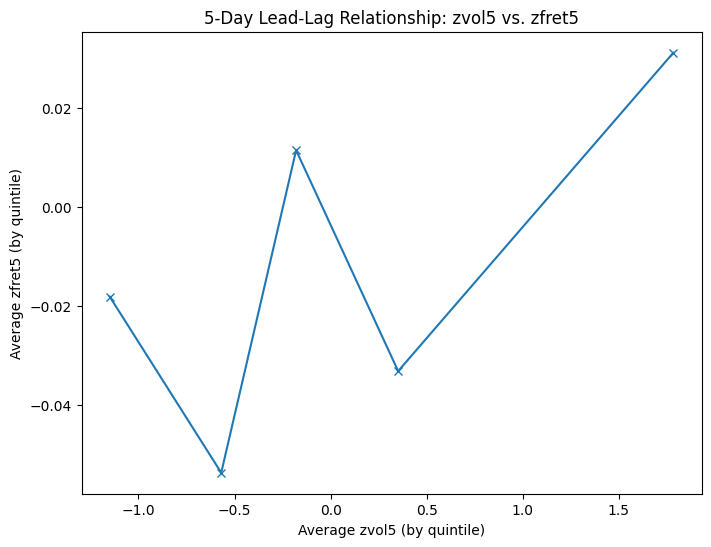

In [58]:
# Lead-Lag Relationship: Group by quintile and compute average zvol5 and average zfret5.
leadlag_rels_5 = df_trim_5.groupby('zvol5_quintile').agg({'zvol5': 'mean', 'zfret5': 'mean'}).reset_index()
print("5-Day Lead-Lag Stats:")
print(leadlag_rels_5)

# Plot lead-lag relationship: zvol5 (X-axis) vs. zfret5 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(leadlag_rels_5['zvol5'], leadlag_rels_5['zfret5'], marker='x')
plt.xlabel('Average zvol5 (by quintile)')
plt.ylabel('Average zfret5 (by quintile)')
plt.title('5-Day Lead-Lag Relationship: zvol5 vs. zfret5')
plt.show()

10-Day Concurrent Stats:
   zvol10_quintile    zvol10    zret10
0                1 -1.192243  0.099608
1                2 -0.611070  0.121549
2                3 -0.190279  0.015795
3                4  0.385616 -0.045447
4                5  1.927636 -0.290449


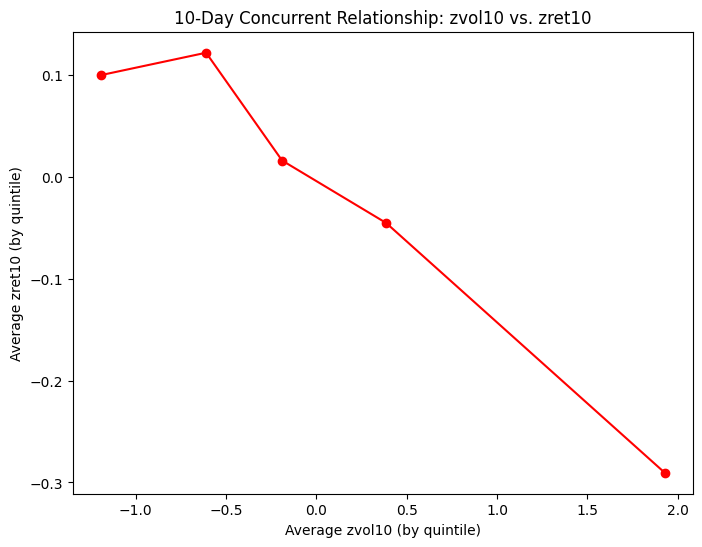

In [59]:
# Concurrent Relationship: Group by quintile and compute average zvol10 and average zret10.
df_trim_10 = df.dropna(subset=['zvol10', 'zret10', 'zfret10']).copy()
df_trim_10['zvol10_quintile'] = pd.qcut(df_trim_10['zvol10'], 5, labels=False) + 1
concurrent_rels_10 = df_trim_10.groupby('zvol10_quintile').agg({'zvol10': 'mean', 'zret10': 'mean'}).reset_index()
print("10-Day Concurrent Stats:")
print(concurrent_rels_10)

# Plot concurrent relationship: zvol10 (X-axis) vs. zret10 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(concurrent_rels_10['zvol10'], concurrent_rels_10['zret10'], marker='o', color='red')
plt.xlabel('Average zvol10 (by quintile)')
plt.ylabel('Average zret10 (by quintile)')
plt.title('10-Day Concurrent Relationship: zvol10 vs. zret10')
plt.show()

10-Day Lead-Lag Stats:
   zvol10_quintile    zvol10   zfret10
0                1 -1.192243 -0.094370
1                2 -0.611070 -0.040572
2                3 -0.190279 -0.025450
3                4  0.385616  0.017445
4                5  1.927636  0.033462


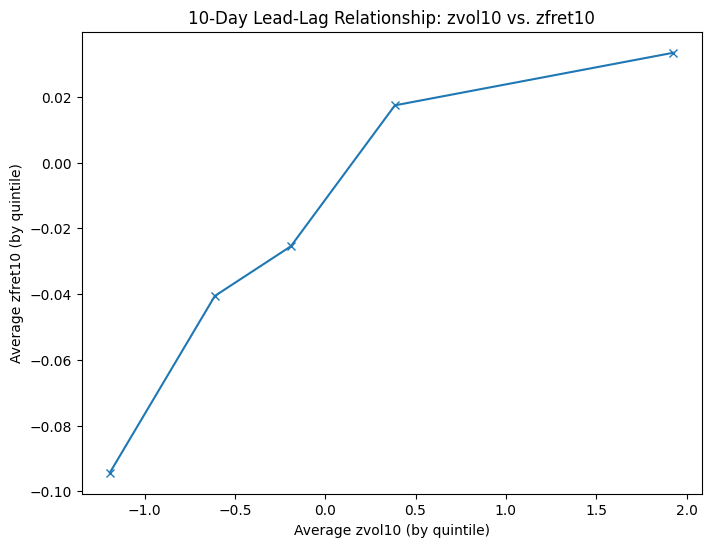

In [60]:
# Lead-Lag Relationship: Group by quintile and compute average zvol10 and average zfret10.
leadlag_rels_10 = df_trim_10.groupby('zvol10_quintile').agg({'zvol10': 'mean', 'zfret10': 'mean'}).reset_index()
print("10-Day Lead-Lag Stats:")
print(leadlag_rels_10)

# Plot lead-lag relationship: zvol10 (X-axis) vs. zfret10 (Y-axis).
plt.figure(figsize=(8,6))
plt.plot(leadlag_rels_10['zvol10'], leadlag_rels_10['zfret10'], marker='x')
plt.xlabel('Average zvol10 (by quintile)')
plt.ylabel('Average zfret10 (by quintile)')
plt.title('10-Day Lead-Lag Relationship: zvol10 vs. zfret10')
plt.show()

Now, we work on the analysis for 20-day indicators:

Define a simple strategy signal based on zvol20:
- Signal = +1 when zvol20 < -1 (low volatility → go long - buy)
- Signal = -1 when zvol20 > 1 (high volatility → go short - sell)
- Else, signal = 0 (no position)

In [61]:
df_strat = df_trim.copy()
df_strat['signal'] = 0
df_strat.loc[df_strat['zvol20'] < -1, 'signal'] = 1
df_strat.loc[df_strat['zvol20'] > 1, 'signal'] = -1

In [62]:
df_strat['daily_return'] = df_strat['daily % chg'] / 100
df_strat['strategy_return'] = df_strat['signal'] * df_strat['daily_return']
df_strat['excess_return'] = df_strat['strategy_return'] - df_strat['daily_return']

mean_excess = df_strat['excess_return'].mean()
std_excess = df_strat['excess_return'].std(ddof=1)

IR_daily = mean_excess / std_excess if std_excess != 0 else np.nan

IR_annualized = IR_daily * np.sqrt(252)

In [63]:
print("Results of our Trading Strategy :")
print("Mean Excess Return (Daily):", mean_excess)
print("Standard Deviation of Excess Return (Daily):", std_excess)
print("Information Ratio (Daily):", IR_daily)
print("Annualized Information Ratio:", IR_annualized)

Results of our Trading Strategy :
Mean Excess Return (Daily): -0.0002970601097733385
Standard Deviation of Excess Return (Daily): 0.013579985864821571
Information Ratio (Daily): -0.021874846758335828
Annualized Information Ratio: -0.34725242694122416


In [66]:
import statsmodels.api as sm

def analyze_relationships(df_temp, window):
    zvol = f'zvol{window}'
    zret = f'zret{window}'
    zfret = f'zfret{window}'
    
    corr_concurrent = df_temp[[zvol, zret]].corr().iloc[0,1] # Compute correlations concurrent
    corr_leadlag = df_temp[[zvol, zfret]].corr().iloc[0,1] # Compute correlations lead-lag

    print(f"{window}-day correlations:")
    print(f"Concurrent (zvol vs. zret): {corr_concurrent:.3f}")
    print(f"Lead-Lag (zvol vs. zfret): {corr_leadlag:.3f}")

    X_conc = sm.add_constant(df_temp[zvol])
    model_conc = sm.OLS(df_temp[zret], X_conc).fit()
    r2_conc = model_conc.rsquared

    X_lead = sm.add_constant(df_temp[zvol])
    model_lead = sm.OLS(df_temp[zfret], X_lead).fit()
    r2_lead = model_lead.rsquared

    print(f"Regression R² (Concurrent): {r2_conc:.3f}")
    print(f"Regression R² (Lead-Lag): {r2_lead:.3f}\n")

In [67]:
print("Analysis on 5-day window:")
analyze_relationships(df_trim_5, 5)

print("Analysis on 10-day window:")
analyze_relationships(df_trim_10, 10)

print("Analysis pn 20-day window:")
analyze_relationships(df_trim, 20)

Analysis on 5-day window:
5-day correlations:
Concurrent (zvol vs. zret): -0.112
Lead-Lag (zvol vs. zfret): 0.020
Regression R² (Concurrent): 0.013
Regression R² (Lead-Lag): 0.000

Analysis on 10-day window:
10-day correlations:
Concurrent (zvol vs. zret): -0.189
Lead-Lag (zvol vs. zfret): 0.031
Regression R² (Concurrent): 0.036
Regression R² (Lead-Lag): 0.001

Analysis pn 20-day window:
20-day correlations:
Concurrent (zvol vs. zret): -0.239
Lead-Lag (zvol vs. zfret): 0.076
Regression R² (Concurrent): 0.057
Regression R² (Lead-Lag): 0.006



Interpretation of the results obtained:
1. Concurrent Relationship Strengthens with Window Size

- 5-day window: Weak negative correlation (-0.113) between volatility and returns
- 10-day window: Moderate negative correlation (-0.189)
- 20-day window: Stronger negative correlation (-0.239)

This indicates that as we examine longer time periods, higher volatility more clearly corresponds with lower concurrent returns.

2. Lead-Lag Relationship Emerges Only at Longer Windows

- 5-day window: Negligible correlation (0.021)
- 10-day window: Minimal correlation (0.031)
- 20-day window: Small positive correlation (0.076)

The 20-day window shows a weak but discernible tendency for high volatility to precede positive future returns, suggesting potential mean reversion over longer horizons.

3. Limited Explanatory Power Across All Windows


All R² values remain below 0.06, with the 20-day concurrent relationship explaining the most variance (5.7%). This underscores that while volatility provides some insights, it alone cannot reliably predict market movements.

FINAL NOTE:

The findings suggest that volatility metrics provide modest predictive value, with longer time windows (20 days) capturing more meaningful relationships than shorter ones. The weak positive lead-lag relationship at the 20-day window hints at potential mean reversion after volatile periods, though this effect is too small to form the sole basis of a trading strategy. These results highlight the complex, multifaceted nature of market behavior, where volatility serves as just one of many relevant factors.

## PART B

In [86]:
def implement_trading_strategy(data, strategy_type='combined'):
    # Create a copy to avoid modifying the original DataFrame
    df_strategy = data.copy()
    
    # Make sure we have valid data
    # df_strategy = df_strategy.dropna(subset=['zvol20', 'zret20', 'zfret20', 'daily_return'])
    
    # 1. Define signals based on normalized indicators
    # For volatility signal: invert it because higher volatility typically means bearish outlook
    df_strategy['signal_vol'] = np.clip(-df_strategy['zvol20'], -1, 1)
    
    # For momentum signal: use historical returns as indicator
    df_strategy['signal_mom'] = np.clip(df_strategy['zret20'], -1, 1)
    
    # 2. Combine signals as needed
    if strategy_type == 'volatility':
        df_strategy['final_signal'] = df_strategy['signal_vol']
    elif strategy_type == 'momentum':
        df_strategy['final_signal'] = df_strategy['signal_mom']
    else:  # combined
        df_strategy['final_signal'] = 0.5 * df_strategy['signal_vol'] + 0.5 * df_strategy['signal_mom']
    
    # 3. Calculate strategy returns
    # Convert daily percentage change to decimal form if needed
    if 'daily_return' not in df_strategy.columns:
        df_strategy['daily_return'] = df_strategy['daily % chg'] / 100
    
    # Calculate strategy returns
    df_strategy['strategy_return'] = df_strategy['final_signal'] * df_strategy['daily_return']
    
    # 4. Calculate cumulative returns
    df_strategy['cum_strategy'] = (1 + df_strategy['strategy_return']).cumprod()
    df_strategy['cum_benchmark'] = (1 + df_strategy['daily_return']).cumprod()
    
    # 5. Calculate excess returns
    df_strategy['excess_return'] = df_strategy['strategy_return'] - df_strategy['daily_return']
    
    return df_strategy

In [87]:
def calculate_performance_metrics(strategy_df):
    # Calculate mean and standard deviation of excess returns
    mean_excess = strategy_df['excess_return'].mean()
    std_excess = strategy_df['excess_return'].std()
    
    # Calculate Information Ratio
    IR_daily = mean_excess / std_excess if std_excess != 0 else np.nan
    IR_annualized = IR_daily * np.sqrt(252)  # Assuming 252 trading days per year
    
    # Calculate Sharpe Ratio for the strategy
    risk_free_rate = 0.0  # Simplified assumption, can be adjusted
    mean_strategy = strategy_df['strategy_return'].mean()
    std_strategy = strategy_df['strategy_return'].std()
    sharpe_daily = (mean_strategy - risk_free_rate) / std_strategy if std_strategy != 0 else np.nan
    sharpe_annualized = sharpe_daily * np.sqrt(252)
    
    # Calculate maximum drawdown
    cumulative_returns = strategy_df['cum_strategy']
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max) - 1
    max_drawdown = drawdown.min()
    
    # Calculate win rate
    win_rate = (strategy_df['excess_return'] > 0).mean()
    
    return {
        'mean_excess_return': mean_excess,
        'std_excess_return': std_excess,
        'IR_daily': IR_daily,
        'IR_annualized': IR_annualized,
        'sharpe_annualized': sharpe_annualized,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'final_cumulative_return': strategy_df['cum_strategy'].iloc[-1],
        'benchmark_cumulative_return': strategy_df['cum_benchmark'].iloc[-1]
    }

In [88]:
def analyze_market_regimes(strategy_df, window=200):
    # Calculate moving average to define market regimes
    if 'Close' not in strategy_df.columns:
        strategy_df['Close'] = strategy_df['Price']  # Adjust based on your data
    
    strategy_df['MA200'] = strategy_df['Close'].rolling(window=window).mean()
    strategy_df['regime'] = np.where(strategy_df['Close'] >= strategy_df['MA200'], 'Bull', 'Bear')
    
    # Group by regime and calculate performance metrics
    regime_perf = strategy_df.groupby('regime').agg(
        cum_strategy_final=('cum_strategy', 'last'),
        cum_benchmark_final=('cum_benchmark', 'last'),
        mean_strategy=('strategy_return', 'mean'),
        std_strategy=('strategy_return', 'std'),
        mean_excess=('excess_return', 'mean'),
        std_excess=('excess_return', 'std'),
        count=('excess_return', 'count')
    ).reset_index()
    
    # Calculate IR for each regime
    regime_perf['IR'] = regime_perf['mean_excess'] / regime_perf['std_excess']
    regime_perf['IR_annualized'] = regime_perf['IR'] * np.sqrt(252)
    
    return regime_perf

In [89]:
def plot_strategy_performance(strategy_df, title="Trading Strategy Performance"):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Plot cumulative returns
    ax.plot(strategy_df.index, strategy_df['cum_strategy'], label='Strategy', color='blue')
    ax.plot(strategy_df.index, strategy_df['cum_benchmark'], label='Benchmark (S&P500)', color='red')
    
    # Add labels and title
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Return', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # If index is datetime, format x-axis properly
    if isinstance(strategy_df.index, pd.DatetimeIndex):
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
        fig.autofmt_xdate()
    
    plt.tight_layout()
    return fig

In [90]:
def main_strategy_analysis(data_path):
    # Load data
    data = pd.read_csv(data_path)
    
    # Implement combined strategy (volatility + momentum)
    strategy_df = implement_trading_strategy(data, strategy_type='combined')
    
    # Calculate performance metrics
    metrics = calculate_performance_metrics(strategy_df)
    
    # Analyze performance by market regime
    regime_performance = analyze_market_regimes(strategy_df)
    
    # Print results
    print("Combined Trading Strategy Results:")
    for key, value in metrics.items():
        print(f"{key}: {value:.6f}" if isinstance(value, (float, np.float64, np.float32)) else f"{key}: {value}")
    
    print("\nPerformance by Market Regime:")
    print(regime_performance)
    
    # Plot cumulative returns
    fig = plot_strategy_performance(strategy_df)
    plt.savefig('strategy_performance.png')
    plt.show()
    
    return strategy_df, metrics, regime_performance

In [91]:
def compare_strategies(data):
    # Implement different strategies
    vol_strategy = implement_trading_strategy(data, strategy_type='volatility')
    mom_strategy = implement_trading_strategy(data, strategy_type='momentum')
    combined_strategy = implement_trading_strategy(data, strategy_type='combined')
    
    # Calculate metrics for each strategy
    vol_metrics = calculate_performance_metrics(vol_strategy)
    mom_metrics = calculate_performance_metrics(mom_strategy)
    combined_metrics = calculate_performance_metrics(combined_strategy)
    
    # Create comparison DataFrame
    comparison = pd.DataFrame({
        'Volatility': [vol_metrics['IR_annualized'], vol_metrics['sharpe_annualized'], 
                     vol_metrics['max_drawdown'], vol_metrics['win_rate'], 
                     vol_metrics['final_cumulative_return']],
        'Momentum': [mom_metrics['IR_annualized'], mom_metrics['sharpe_annualized'], 
                   mom_metrics['max_drawdown'], mom_metrics['win_rate'], 
                   mom_metrics['final_cumulative_return']],
        'Combined': [combined_metrics['IR_annualized'], combined_metrics['sharpe_annualized'], 
                   combined_metrics['max_drawdown'], combined_metrics['win_rate'], 
                   combined_metrics['final_cumulative_return']]
    }, index=['IR (Annual)', 'Sharpe (Annual)', 'Max Drawdown', 'Win Rate', 'Final Cum Return'])
    
    # Plot cumulative returns for comparison
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(vol_strategy.index, vol_strategy['cum_strategy'], label='Volatility Strategy', alpha=0.7)
    ax.plot(mom_strategy.index, mom_strategy['cum_strategy'], label='Momentum Strategy', alpha=0.7)
    ax.plot(combined_strategy.index, combined_strategy['cum_strategy'], label='Combined Strategy', alpha=0.7)
    ax.plot(combined_strategy.index, combined_strategy['cum_benchmark'], label='Benchmark (S&P500)', alpha=0.7)
    
    ax.set_title('Comparison of Trading Strategies', fontsize=15)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Return', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    if isinstance(combined_strategy.index, pd.DatetimeIndex):
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
        fig.autofmt_xdate()
    
    plt.tight_layout()
    plt.savefig('strategy_comparison.png')
    plt.show()
    
    return comparison

Combined Trading Strategy Results:
mean_excess_return: 0.000292
std_excess_return: 0.012964
IR_daily: 0.022545
IR_annualized: 0.357895
sharpe_annualized: 1.709476
max_drawdown: -0.141421
win_rate: 0.464368
final_cumulative_return: 515.039055
benchmark_cumulative_return: 21.691685

Performance by Market Regime:
  regime  cum_strategy_final  cum_benchmark_final  mean_strategy  \
0   Bear          515.039055            21.691685       0.000839   
1   Bull          517.138662            24.056253       0.000550   

   std_strategy  mean_excess  std_excess  count        IR  IR_annualized  
0      0.008460     0.001546    0.018501   3114  0.083563       1.326526  
1      0.004357    -0.000272    0.009416   6919 -0.028886      -0.458546  


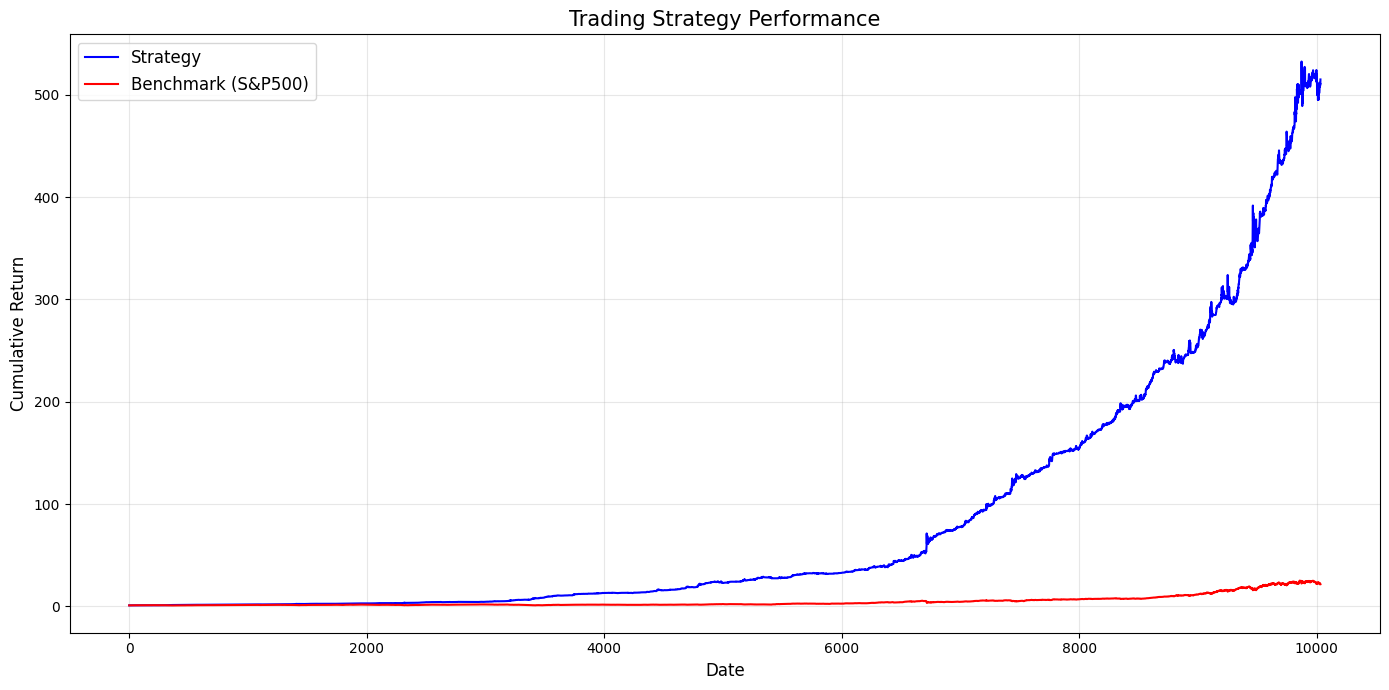

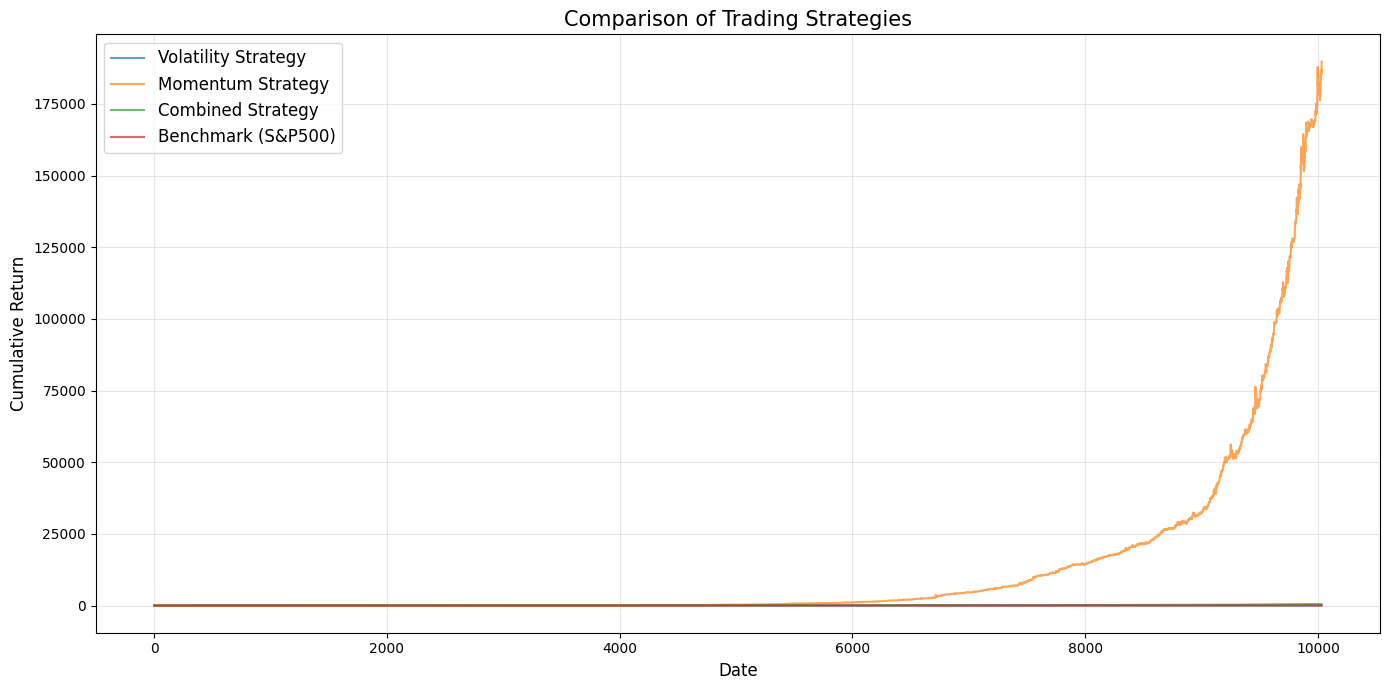


Strategy Comparison:
                  Volatility       Momentum    Combined
IR (Annual)        -0.345728       1.075729    0.357895
Sharpe (Annual)     0.094561       2.772992    1.709476
Max Drawdown       -0.616385      -0.141421   -0.141421
Win Rate            0.402273       0.420512    0.464368
Final Cum Return    1.187946  189791.489400  515.039055


In [92]:
data_path = 'cleaned_data.csv'

# Run main analysis
strategy_df, metrics, regime_performance = main_strategy_analysis(data_path)

# Compare different strategies
strategy_comparison = compare_strategies(strategy_df)
print("\nStrategy Comparison:")
print(strategy_comparison)

In [85]:
df_trim

,Date,Close,daily % chg,20day vol,previous 20d return,next 20 day return,zvol20,zfret20,zret20,vol20,ret20,fret20
270,1961-01-27,61.240002,1.022770,NaN,NaN,NaN,-1.019421,0.721850,1.513737,0.463927,5.495268,3.363809
271,1961-01-30,61.970001,1.192030,NaN,NaN,NaN,-0.751036,0.426471,1.835700,0.505493,6.642574,2.372112
272,1961-01-31,61.779999,-0.306603,NaN,NaN,NaN,-1.164286,0.509438,2.014070,0.439102,7.312835,2.670769
273,1961-02-01,61.900002,0.194242,NaN,NaN,NaN,-1.597756,0.645076,1.637665,0.368761,6.065800,3.150236
274,1961-02-02,62.299999,0.646199,NaN,NaN,NaN,-1.531321,0.491147,1.712923,0.376860,6.368446,2.648478
...,...,...,...,...,...,...,...,...,...,...,...,...
10298,2000-11-24,1341.770020,1.467833,NaN,NaN,NaN,0.223308,-0.508096,-0.398901,1.360212,-1.661482,-2.669613
10299,2000-11-27,1348.969971,0.536601,NaN,NaN,NaN,0.167967,-0.465126,-0.523177,1.339830,-2.218790,-2.504135
10300,2000-11-28,1336.089966,-0.954803,NaN,NaN,NaN,0.076190,-0.016248,-1.036610,1.304827,-4.473572,-0.536635
10301,2000-11-29,1341.930054,0.437103,NaN,NaN,NaN,-0.221554,-0.020505,-1.406572,1.187171,-6.119349,-0.574552


In [81]:
df_trim.to_csv('cleaned_data.csv', index=False)